In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
# Load in the data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# Check that no reviews is longer than 10,000 words (note that there is a sequence of works for each of the movies
# in the training data)
max([max(sequence) for sequence in train_data])

9999

### Data preparation

The data is currently in the form of integers. We cannot feed them to the network as is, but we need to turn the lists into tensors. We one-hot encode the lists. This allows us to use as first layer a `Dense` layer, which can handle floating point vector data

Let's vectorize the data first.

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
# Now let's vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
# And let's also vectorize the labels (turn integers into vectors
# of floats of length 25,000)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the network

We build a network with two intermediate layers with 16 hidden units each. The third layer will output the scalar prediction (0 or 1).
We use `relu` functions in the intermediate layers, while we use a sigmoid in the output layer. This will output a probability of the review being positive (having label = 1)

In [16]:
from keras import models
from keras import layers

In [17]:
# Define model
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [19]:
# Compile model and pick loss function and optimizer
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [53]:
# Now create a validation set from the original training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [54]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.5936 - acc: 0.7072 - val_loss: 0.4990 - val_acc: 0.8602
Epoch 2/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3582 - acc: 0.8887 - val_loss: 0.3246 - val_acc: 0.8829
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2407 - acc: 0.9245 - val_loss: 0.2934 - val_acc: 0.8858
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1838 - acc: 0.9426 - val_loss: 0.2939 - val_acc: 0.8824
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1455 - acc: 0.9547 - val_loss: 0.3288 - val_acc: 0.8714
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1201 - acc: 0.9624 - val_loss: 0.3487 - val_acc: 0.8682
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0982 - acc: 0.9703 - val_loss: 0.3239 - 

In [56]:
# Examining the model training
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [62]:
# Now let's plot the training and validation loss
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

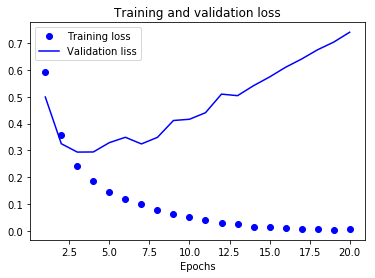

In [63]:
# "bo" is for "blued dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b" is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation liss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

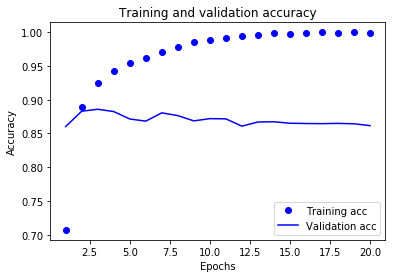

In [84]:
# And now plot the training and validation accuracy
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [66]:
# Re-train the model from scratch only on 4 epochs to avoid over fitting
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.5336 - acc: 0.7662
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.3327 - acc: 0.9028
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2279 - acc: 0.9276
Epoch 4/4
25000/25000 [==============================] - 3s 114us/step


In [67]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 109us/step


In [68]:
print(results)

[0.30895852510452271, 0.88019999999999998]


In [69]:
# Now use the trained model for predictions
model.predict(x_test)

array([[ 0.00127354],
       [ 0.11976437],
       [ 0.93381214],
       ..., 
       [ 0.03002505],
       [ 0.86452699],
       [ 0.49728775]], dtype=float32)

### Further experiments

**Experiment 1: Use 1 or 3 hidden layers and see how it affects validation and test accuracy**

In [73]:
# One hidden layer
model1 = models.Sequential()
model1.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model1.add(layers.Dense(1, activation = 'sigmoid'))

# Three hidden layers
model3 = models.Sequential()
model3.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model3.add(layers.Dense(16, activation = 'relu'))
model3.add(layers.Dense(16, activation = 'relu'))          
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [74]:
model1.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model3.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [75]:
history1 = model1.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

history3 = model3.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.5044 - acc: 0.8019 - val_loss: 0.3990 - val_acc: 0.8694
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3234 - acc: 0.9022 - val_loss: 0.3281 - val_acc: 0.8833
Epoch 3/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2486 - acc: 0.9265 - val_loss: 0.2974 - val_acc: 0.8883
Epoch 4/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2025 - acc: 0.9410 - val_loss: 0.2850 - val_acc: 0.8897
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1714 - acc: 0.9499 - val_loss: 0.2834 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1472 - acc: 0.9557 - val_loss: 0.3057 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1284 - acc: 0.9625 - val_loss: 0.2913 - 

In [80]:
history1_dict = history1.history
history3_dict = history3.history
acc1 = history1_dict['acc']
val_acc1 = history1_dict['val_acc']
acc3 = history3_dict['acc']
val_acc3 = history3_dict['val_acc']

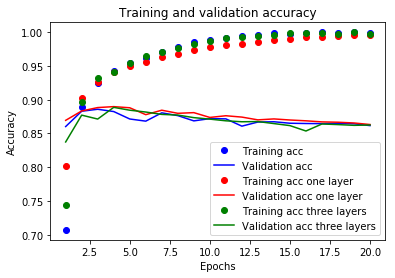

In [85]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, acc1, 'ro', label='Training acc one layer')
plt.plot(epochs, val_acc1, 'r', label='Validation acc one layer')
plt.plot(epochs, acc3, 'go', label='Training acc three layers')
plt.plot(epochs, val_acc3, 'g', label='Validation acc three layers')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Experiment 2: Use layers with more or fewer hidden units**

In [86]:
# Two layers, fewer hidden units
modelFew = models.Sequential()
modelFew.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
modelFew.add(layers.Dense(8, activation = 'relu'))
modelFew.add(layers.Dense(1, activation = 'sigmoid'))

# Two layers, more hidden units
modelMany = models.Sequential()
modelMany.add(layers.Dense(128, activation = 'relu', input_shape = (10000,)))
modelMany.add(layers.Dense(128, activation = 'relu'))         
modelMany.add(layers.Dense(1, activation = 'sigmoid'))

In [87]:
modelFew.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

modelMany.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [88]:
historyFew = modelFew.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

historyMany = modelMany.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.5321 - acc: 0.7831 - val_loss: 0.4167 - val_acc: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3382 - acc: 0.9008 - val_loss: 0.3448 - val_acc: 0.8783
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2516 - acc: 0.9297 - val_loss: 0.3124 - val_acc: 0.8771
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2023 - acc: 0.9408 - val_loss: 0.2937 - val_acc: 0.8828
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1672 - acc: 0.9513 - val_loss: 0.2868 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1405 - acc: 0.9589 - val_loss: 0.2923 - val_acc: 0.8844
Epoch 7/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1190 - acc: 0.9679 - val_loss: 0.2982 - 

In [93]:
historyFew_dict = historyFew.history
historyMany_dict = historyMany.history
accFew = historyFew_dict['acc']
val_accFew = historyFew_dict['val_acc']
accMany = historyMany_dict['acc']
val_accMany = historyMany_dict['val_acc']

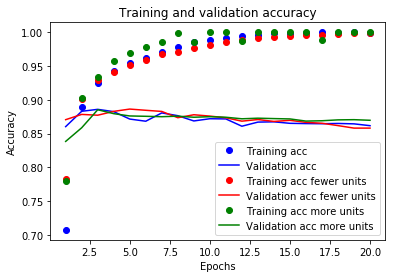

In [94]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, accFew, 'ro', label='Training acc fewer units')
plt.plot(epochs, val_accFew, 'r', label='Validation acc fewer units')
plt.plot(epochs, accMany, 'go', label='Training acc more units')
plt.plot(epochs, val_accMany, 'g', label='Validation acc more units')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Experiment 3: Use the `mse` loss function instead of `binary_crossentropy`**

In [97]:
# Two layers, using MSE as loss
modelMSE = models.Sequential()
modelMSE.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
modelMSE.add(layers.Dense(8, activation = 'relu'))
modelMSE.add(layers.Dense(1, activation = 'sigmoid'))

modelMSE.compile(optimizer = 'rmsprop',
               loss = 'mse',
               metrics = ['accuracy'])

historyMSE = modelMSE.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

historyMSE_dict = historyMSE.history

accMSE = historyMSE_dict['acc']
val_accMSE = historyMSE_dict['val_acc']

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1812 - acc: 0.7891 - val_loss: 0.1352 - val_acc: 0.8648
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1054 - acc: 0.9009 - val_loss: 0.1045 - val_acc: 0.8810
Epoch 3/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0767 - acc: 0.9251 - val_loss: 0.1007 - val_acc: 0.8699
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.0603 - acc: 0.9400 - val_loss: 0.0873 - val_acc: 0.8856
Epoch 5/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0490 - acc: 0.9519 - val_loss: 0.0869 - val_acc: 0.8833
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0409 - acc: 0.9592 - val_loss: 0.0857 - val_acc: 0.8841
Epoch 7/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0342 - acc: 0.9681 - val_loss: 0.0859 - 

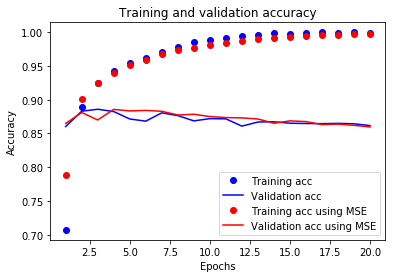

In [98]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, accMSE, 'ro', label='Training acc using MSE')
plt.plot(epochs, val_accMSE, 'r', label='Validation acc using MSE')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Experiment 4: use the `tanh` activation function instead of `relu`**

In [99]:
# Two layers, using tanh instead of relu
modelT = models.Sequential()
modelT.add(layers.Dense(8, activation = 'tanh', input_shape = (10000,)))
modelT.add(layers.Dense(8, activation = 'tanh'))
modelT.add(layers.Dense(1, activation = 'sigmoid'))

modelT.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

historyT = modelT.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

historyT_dict = historyT.history

accT = historyT_dict['acc']
val_accT = historyT_dict['val_acc']

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.5022 - acc: 0.7997 - val_loss: 0.3987 - val_acc: 0.8676
Epoch 2/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3212 - acc: 0.9059 - val_loss: 0.3262 - val_acc: 0.8824
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2426 - acc: 0.9313 - val_loss: 0.3262 - val_acc: 0.8641
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1909 - acc: 0.9476 - val_loss: 0.2817 - val_acc: 0.8884
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1534 - acc: 0.9599 - val_loss: 0.2857 - val_acc: 0.8818
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1262 - acc: 0.9671 - val_loss: 0.2915 - val_acc: 0.8854
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1037 - acc: 0.9736 - val_loss: 0.3089 - 

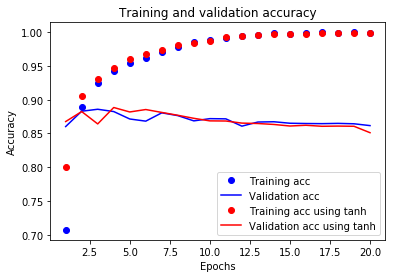

In [100]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, accT, 'ro', label='Training acc using tanh')
plt.plot(epochs, val_accT, 'r', label='Validation acc using tanh')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()